In [208]:
import random
from io import BytesIO

import pandas as pd
import requests
from PIL import Image

In [209]:
def get_map(map_type='map', latitude=37.620070, longitude=55.753630, map_size=(450, 450), scale=13,
            point='37.620070,55.753630,pmwtm1', lang='ru_RU',
            bbox=(36.620070, 54.753630, 38.620070, 56.753630)) -> None:
    params = {
        "ll": f"{latitude},{longitude}",
        "l": map_type,
        "size": f"{map_size[0]},{map_size[1]}",
        "z": scale,
        "pt": point,
        "lang": lang,
        "bbox": f"{bbox[0]+0.01},{bbox[1]+0.01}~{bbox[2]+0.01},{bbox[3]+0.01}"
    }
    try:
        print(requests.get(f'https://static-maps.yandex.ru/1.x/', params=params).url)
        response = requests.get(f'https://static-maps.yandex.ru/1.x/', params=params)

    except ConnectionError as exc:
        print(exc)
    else:
        if response.status_code == requests.codes.ok:
            display(Image.open(BytesIO(response.content)))
        else:
            response.raise_for_status()

https://static-maps.yandex.ru/1.x/?ll=37.62007%2C55.75363&l=sat%2Cskl&size=450%2C450&z=13&pt=37.620070%2C55.753630%2Cpmwtm1&lang=ru_RU&bbox=36.630069999999996%2C54.76363~38.630069999999996%2C56.76363


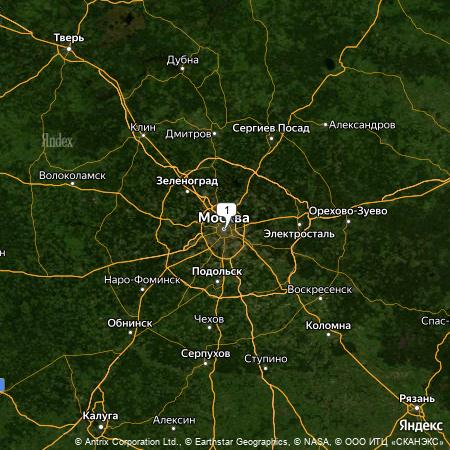

In [210]:
get_map(map_type='sat,skl')

Дагестан
https://static-maps.yandex.ru/1.x/?ll=44.2499627%2C47.926598&l=map&size=450%2C450&z=1&pt=42.057669%2C48.288776%2Cpmwtm1~42.565141%2C47.871078%2Cpmwtm2~42.821749%2C47.115927%2Cpmwtm3~42.890833%2C47.635674%2Cpmwtm4~42.98306%2C47.504682%2Cpmwtm5~43.204637%2C46.866878%2Cpmwtm6~43.246265%2C46.590044%2Cpmwtm7~43.84738%2C46.711685%2Cpmwtm8~44.660166%2C45.649966%2Cpmwtm9~54.222727%2C55.03127%2Cpmwtm10&lang=ru_RU&bbox=54.232727%2C45.659966~42.067668999999995%2C55.04127


C:\Users\sim20\AppData\Local\Temp\ipykernel_12208\4257443351.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lat_min = float(data.loc[data['Регион'] == region].groupby('Регион')['lat'].min())
C:\Users\sim20\AppData\Local\Temp\ipykernel_12208\4257443351.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lat_max = float(data.loc[data['Регион'] == region].groupby('Регион')['lat'].max())
C:\Users\sim20\AppData\Local\Temp\ipykernel_12208\4257443351.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lng_min = float(data.loc[data['Регион'] == region].groupby('Регион')['lng'].min())
C:\Users\sim20\AppData\Local\Temp\ipykernel_12208\4257443351.py:9: FutureWarning: Calling float on a single element

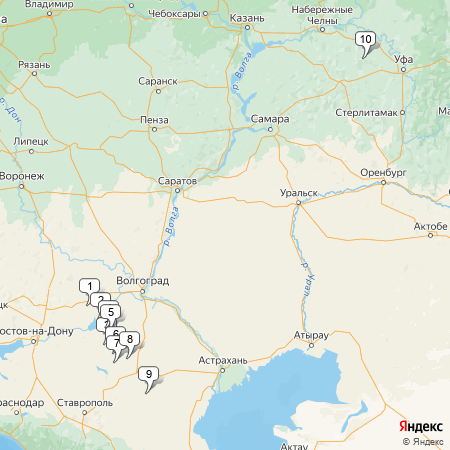

In [211]:
data = pd.read_csv('cities.csv', header=0, delimiter=';')
region = random.choice(data['Регион'].unique())
lat = data.loc[data['Регион'] == region].groupby('Регион')['lat'].mean()
lng = data.loc[data['Регион'] == region].groupby('Регион')['lng'].mean()
cities = ''
lat_min = float(data.loc[data['Регион'] == region].groupby('Регион')['lat'].min())
lat_max = float(data.loc[data['Регион'] == region].groupby('Регион')['lat'].max())
lng_min = float(data.loc[data['Регион'] == region].groupby('Регион')['lng'].min())
lng_max = float(data.loc[data['Регион'] == region].groupby('Регион')['lng'].max())
count = 1
for i, row in data.loc[data['Регион'] == region].sort_values(['lat', 'lng']).iterrows():
    cities += f"{float(row['lat'])},{float(row['lng'])},pmwtm{count}~"
    count += 1
print(region)
get_map(latitude=float(lat), longitude=float(lng), point=cities[:-1], bbox=(lat_max, lng_min, lat_min, lng_max),
        scale=1)